# Friedman Robertson Lemaitre Walker Metric
##  Geoff Cope
##  University of Utah
##  December 22, 2021

This form of the FRLW metric is taken from "A First Course In General Relativity" by Foster and Nightengale page 186 equation 6.2  The Christoffel Symbols are listed as equation 6.4 and the Ricci Tensor is given as equation 6.5  Still trying to figure out how to typeset dtheta and dphi.  Using from sympy.diffgeom.rn import * and R2.dtheta will give an appropriate dtheta but haven't figured out dphi yet.  PLEASE NOTE:  It appears that the convention used here for the Ricci Tensor is the negative of that given in Foster and Nightengale. TO DO:  Construct Stress Energy Tensor, equate SET to Einstein to get two ODE's.  Give initial conitions for ODE's and plot

http://chiataimakro.vicp.cc:8880/%E5%BE%85%E6%95%B4%E7%90%86/Foster,.Nightingale,.A.Short.Course.in.General.Relativity,.3ed,.Springer,.2006,.295s.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,phi,k,dt,dr,dx,dy = symbols('t r theta phi k dt dr dx dy')

In [5]:
R = Function('R')(t)
R

In [6]:
variables = Matrix( [t,r,theta,phi])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix( [dt,dr,dx,dy])
differentials

⎡dt⎤
⎢  ⎥
⎢dr⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

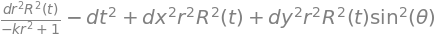

In [10]:
lineElement = expand((-1)*dt**2 + (R**2)*( (1-k * r**2)**-1 * dr**2 + r**2 * dx**2 + r**2 * sin(theta)**2 * dy**2 ))
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡-1      0          0             0        ⎤
⎢                                          ⎥
⎢       2                                  ⎥
⎢      R (t)                               ⎥
⎢0   ──────────     0             0        ⎥
⎢         2                                ⎥
⎢    - k⋅r  + 1                            ⎥
⎢                                          ⎥
⎢                 2  2                     ⎥
⎢0       0       r ⋅R (t)         0        ⎥
⎢                                          ⎥
⎢                           2  2       2   ⎥
⎣0       0          0      r ⋅R (t)⋅sin (θ)⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡-1      0          0             0        ⎤
⎢                                          ⎥
⎢       2                                  ⎥
⎢      R (t)                               ⎥
⎢0   ──────────     0             0        ⎥
⎢         2                                ⎥
⎢    - k⋅r  + 1                            ⎥
⎢                                          ⎥
⎢                 2  2                     ⎥
⎢0       0       r ⋅R (t)         0        ⎥
⎢                                          ⎥
⎢                           2  2       2   ⎥
⎣0       0          0      r ⋅R (t)⋅sin (θ)⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t r theta phi")
t,r,theta,phi = syms 

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                ⎡           d              
⎢⎡0        0               0                     0            ⎤  ⎢           ──(R(t))       
⎢⎢                                                            ⎥  ⎢           dt             
⎢⎢        d                                                   ⎥  ⎢   0       ────────       
⎢⎢   R(t)⋅──(R(t))                                            ⎥  ⎢             R(t)         
⎢⎢        dt                                                  ⎥  ⎢                          
⎢⎢0  ─────────────         0                     0            ⎥  ⎢d                         
⎢⎢          2                                                 ⎥  ⎢──(R(t))                  
⎢⎢     - k⋅r  + 1                                             ⎥  ⎢dt           k⋅r          
⎢⎢                                                            ⎥  ⎢────────  ──────────      
⎢⎢                   2      d                                 ⎥  ⎢  R(

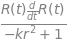

In [21]:
expand(ch.tensor()[0,1,1])

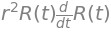

In [22]:
expand(ch.tensor()[0,2,2])

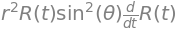

In [23]:
expand(ch.tensor()[0,3,3])

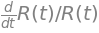

In [24]:
expand(ch.tensor()[1,0,1])

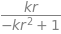

In [25]:
expand(ch.tensor()[1,1,1])

In [26]:
expand(ch.tensor()[1,2,2])

In [27]:
expand(ch.tensor()[1,3,3])

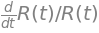

In [28]:
expand(ch.tensor()[2,0,2])

In [29]:
expand(ch.tensor()[2,1,2])

In [30]:
expand(ch.tensor()[2,3,3])

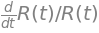

In [31]:
expand(ch.tensor()[3,0,3])

In [32]:
expand(ch.tensor()[3,1,3])

In [33]:
expand(ch.tensor()[3,2,3])

In [34]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡     2                                                                                     
⎢    d                                                                                      
⎢-3⋅───(R(t))                                                                               
⎢     2                                                                                     
⎢   dt                                                                                      
⎢─────────────                     0                                          0             
⎢     R(t)                                                                                  
⎢                                                                                           
⎢                ⎛             2                     2⎞                                     
⎢                ⎜            d            ⎛d       ⎞ ⎟                                     
⎢               -⎜2⋅k + R(t)⋅───(R(t)) + 2⋅⎜──(R(t))⎟ ⎟               

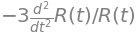

In [35]:
simplify(expand(Ric.tensor()[0,0]))

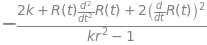

In [36]:
simplify(expand(Ric.tensor()[1,1]))

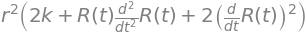

In [37]:
simplify(expand(Ric.tensor()[2,2]))

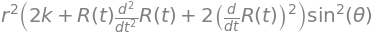

In [38]:
simplify(expand(Ric.tensor()[3,3]))

In [39]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡    ⎛           2                   2⎞       2                                             
⎢    ⎜          d          ⎛d       ⎞ ⎟      d                                              
⎢3.0⋅⎜k + R(t)⋅───(R(t)) + ⎜──(R(t))⎟ ⎟   3⋅───(R(t))                                       
⎢    ⎜           2         ⎝dt      ⎠ ⎟       2                                             
⎢    ⎝         dt                     ⎠     dt                                              
⎢────────────────────────────────────── - ───────────                                       
⎢                 2                           R(t)                                          
⎢                R (t)                                                                      
⎢                                                                                           
⎢                                                                     2                     
⎢                                                                    d

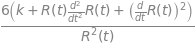

In [40]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [41]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                  ⎡                        2             ⎤                 
⎢                                  ⎢                       d              ⎥                 
⎢                                  ⎢                -R(t)⋅───(R(t))       ⎥                 
⎢                                  ⎢                        2             ⎥       ⎡         
⎢                                  ⎢                      dt              ⎥       ⎢         
⎢                                  ⎢      0         ────────────────  0  0⎥       ⎢        0
⎢                                  ⎢                       2              ⎥       ⎢         
⎢         ⎡0  0  0  0⎤             ⎢                    k⋅r  - 1          ⎥       ⎢         
⎢         ⎢          ⎥             ⎢                                      ⎥       ⎢         
⎢         ⎢0  0  0  0⎥             ⎢       2                              ⎥       ⎢        0
⎢         ⎢          ⎥             ⎢      d                           

In [42]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢ 